In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# notice we are adding two new imports for visualizations; This was not here last class
from itertools import product
from pandas_profiling import ProfileReport

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'


sns.set()

In [123]:
df = pd.read_csv('C:/Users/vasco/OneDrive/Ambiente de Trabalho/Mestrado - Data Science/Data Mining/donors.csv')

C:\Users\vasco\anaconda3\envs\DM\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [124]:
df.head(10)

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A
5,5,2014-01-01,CWR,0,AL,35603,,,NaN,0,...,12.750000,47784,0,L,1,F,X,X,X,C
6,6,2007-01-01,DRK,0,IN,46755,,,1980-01-01,0,...,7.642857,62117,1,L,1,E,X,X,X,D
7,7,2014-01-01,NWN,0,LA,70611,,,NaN,0,...,6.200000,109359,1,L,3,E,X,X,X,C
8,8,2008-01-01,LIS,1,IA,51033,,,NaN,0,...,18.090909,75768,1,L,1,F,X,X,X,D
9,9,2014-01-01,MSD,1,TN,37127-,,,1952-11-01,0,...,9.333333,49909,0,L,1,F,X,X,X,B


In [125]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [126]:
# Categorical variables
cat_vars = [
    "STATE", # category
    
    "NOEXCH", # binary
    
    "RECINHSE", # binary
    #Donation in house
    
    "RECP3", # binary 
    #Public-Private Partnership
    
    "RECPGVG", # binary 
    # planned gift is a contribution that is arranged in the present and allocated at a future date. 
    #Commonly donated through a will or trust, planned gifts are most often granted once the donor has passed away.
    
    "RECSWEEP", # binary 
    #by sweepstakes
    
    "MAJOR", # binary
    "MDMAUD", # category
    "MDMAUD_R", # category
    "MDMAUD_F", # category
    "MDMAUD_A", # category
    
    "DOMAIN", # category
    "HOMEOWNR", # binary
    "CHILD03", # category
    "CHILD07", # category
    "CHILD12", # category
]

# Continuous variables
cont_vars = [
    "AGE", # 
    "",
]

# Variables for plots
plot_vars = [
    "STATE", 
    "ZIP", # clean zip [TODO]
    "GEOCODE2", 
    "ODATEDW", # turn into year-month-01 [TODO]
]

# not used features
drop_vars = [
    "GEOCODE", # 80k nan
    "MAILCODE", 
    "OSOURCE", 
    "DATASRCE",
    "PVASTATE",
    "LIFESRC",
]

# features to process
fe_features = [
    "TCODE", # Shorten it [TODO]
    "DOB", # Create age groups [DONE]
    "ODATEDW" # Create loyalty groups
]

# feature engineering
cat_fe_features = [
    "ageGroup", # category
    "loyaltyGroup", # category
]

cont_fe_features = [
    
]

In [127]:
# dataset data types
df.dtypes

ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 475, dtype: object

In [128]:
# count of missing values
df.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 475, dtype: int64

In [129]:
# duplicated observations
df.duplicated().sum()

0

In [130]:
#df.drop(columns = {'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN',
#                  'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP'}, inplace = True)

In [131]:
# descriptive statistics
df.describe(include="all").T  # try with all and without all

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
RFA_2A,95412,4,F,46964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_R,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_F,95412,4,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_A,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.TCODE = df.TCODE.astype(object)
df['DOB'] = pd.to_datetime(df['DOB'])
df['ODATEDW'] = pd.to_datetime(df['ODATEDW'])

In [133]:
# check data types again
df.dtypes

ODATEDW     datetime64[ns]
OSOURCE             object
TCODE               object
STATE               object
ZIP                 object
                 ...      
RFA_2A              object
MDMAUD_R            object
MDMAUD_F            object
MDMAUD_A            object
GEOCODE2            object
Length: 475, dtype: object

In [134]:
# check descriptive statistics again
df.describe(include="all").T

<ipython-input-134-4f0fb0f0c755>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").T
<ipython-input-134-4f0fb0f0c755>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ODATEDW,95412,54,2015-01-01 00:00:00,15358,2003-06-01,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,55,0,40917,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,95412,57,CA,17343,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RFA_2A,95412,4,F,46964,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_R,95412,5,X,95118,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_F,95412,4,X,95118,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_A,95412,5,X,95118,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#1399 records have a bad addres, we should drop it
df.loc[df['MAILCODE'] == 'B']

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
18,2006-01-01,AMB,28,FL,32810,B,,1956-01-01,0,,...,8.100000,35557,0,L,1,F,X,X,X,B
94,2010-01-01,AML,1,OR,97470,B,,1931-01-01,0,,...,6.444444,177155,1,L,4,E,X,X,X,C
119,2015-01-01,PBL,0,AK,99508,B,,1949-01-01,0,,...,11.000000,184622,0,L,4,E,X,X,X,C
157,2011-01-01,L01,1,FL,32134,B,,NaT,0,,...,8.600000,32340,0,L,3,E,X,X,X,C
187,2016-01-01,L25,1,MN,55804,B,,NaT,0,,...,50.000000,84383,0,L,1,G,X,X,X,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95208,2006-01-01,SAL,2,IN,46229,B,,1967-01-01,0,,...,7.200000,60395,0,L,4,E,X,X,X,B
95235,2006-01-01,DUR,0,TX,78586,B,,1935-12-01,0,,...,13.181818,126617,1,L,1,F,X,X,X,C
95236,2013-01-01,L16,2,TX,78381,B,,NaT,0,,...,30.000000,126057,0,L,2,G,X,X,X,D
95272,2016-01-01,MCO,0,OR,97303-,B,,1955-01-01,0,,...,25.000000,176152,0,L,1,G,X,X,X,B


In [136]:
df = df.loc[df['MAILCODE'] != 'B']
df['MAILCODE']

0         
1         
2         
3         
4         
        ..
95407     
95408     
95409     
95410     
95411     
Name: MAILCODE, Length: 94013, dtype: object

In [137]:
df.loc[df['NOEXCH'] != '0']

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
901,2012-01-01,L03,0,MI,49740,,,1990-12-01,1,,...,10.062500,74361,0,L,2,F,X,X,X,D
955,2006-01-01,MCC,2,TN,37660,,,NaT,1,X,...,9.142857,13767,0,L,1,F,X,X,X,B
1133,2014-01-01,HOS,0,KS,67218,,,1970-01-01,1,,...,18.333333,105942,1,L,1,G,X,X,X,B
1340,2009-01-01,OMH,0,KS,66605,,,1958-01-01,1,,...,4.238095,105151,0,L,3,D,X,X,X,C
1378,2008-01-01,STR,2,FL,32440,,,1951-09-01,X,,...,10.461538,33734,0,L,1,F,X,X,X,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,,,NaT,0,,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,X,...,12.146341,4693,1,L,4,F,X,X,X,A


In [138]:
df.NOEXCH.replace({"X": True, "0": False, "1": False}, inplace=True)
df.RECINHSE.replace({"X": True, " ": False}, inplace=True)
df.RECP3.replace({"X": True, " ": False}, inplace=True)
df.RECPGVG.replace({"X": True, " ": False}, inplace=True)
df.RECSWEEP.replace({"X": True, " ": False}, inplace=True)

0        False
1        False
2        False
3        False
4         True
         ...  
95407    False
95408    False
95409     True
95410    False
95411    False
Name: RECP3, Length: 93669, dtype: bool

In [139]:
df['MDMAUD'].value_counts()

XXXX    93728
C1CM       64
L1CM       43
I1CM       36
D2CM       27
C2CM       24
D1CM       18
L2CM       15
C1LM        8
L1LM        7
I2CM        6
D5MM        5
D5CM        5
D2MM        4
C2LM        3
C2MM        3
I1LM        3
C5CM        3
D5TM        2
C5MM        1
C5TM        1
I2MM        1
I5CM        1
I5MM        1
L1MM        1
L2TM        1
L2LM        1
C1MM        1
Name: MDMAUD, dtype: int64

In [140]:
df['DOMAIN'].value_counts()

R2    13441
T2    12196
S1    11341
S2     8409
C2     8135
C1     6064
C3     5190
T1     4920
R3     4757
U1     4461
U2     3206
U3     2555
       2221
T3     2137
S3     1865
U4     1773
R1     1342
Name: DOMAIN, dtype: int64

In [141]:
df['HOMEOWNR'].value_counts()

H    51841
     21726
U    20446
Name: HOMEOWNR, dtype: int64

In [142]:
df['NUMCHLD'].value_counts()
df['NUMCHLD'].isna().sum()

81734

In [143]:
df['INCOME'].value_counts()
df['INCOME'].isna().sum()

20806

In [144]:
df = df.loc[(df['GENDER'] != 'C') & (df['GENDER'] != 'A')]
df['GENDER'].value_counts()

F    50514
M    38548
      2894
U     1691
J      362
Name: GENDER, dtype: int64

In [145]:
df['WEALTH1'].value_counts()

9.0    7506
8.0    6730
7.0    6132
6.0    5755
5.0    5217
4.0    4758
3.0    4180
2.0    4038
1.0    3412
0.0    2387
Name: WEALTH1, dtype: int64

In [154]:
df['WEALTH1'].isna().sum()

43743

In [146]:
df['HIT'].value_counts()

0     54680
1      8103
2      5562
3      3340
4      2791
      ...  
67        1
69        1
73        1
79        1
84        1
Name: HIT, Length: 75, dtype: int64

In [147]:
df['SOLP3'].value_counts()

      93839
00       73
12       69
01       18
02       10
Name: SOLP3, dtype: int64

In [149]:
df['SOLIH'].value_counts()

      87874
12     5589
01       93
02       72
03       18
04       16
06        7
Name: SOLIH, dtype: int64

In [148]:
df = df.loc[(df['SOLP3'] != '00') & (df['SOLIH'] != '00')]

In [150]:
df['MAJOR'].value_counts()

     93400
X      269
Name: MAJOR, dtype: int64

In [151]:
df.MAJOR.replace({"X": True, " ": False}, inplace=True)

In [152]:
df['WEALTH2'].value_counts()

9.0    6398
8.0    5866
7.0    5567
6.0    5406
5.0    5230
4.0    4960
3.0    4919
2.0    4860
1.0    4094
0.0    3200
Name: WEALTH2, dtype: int64

In [153]:
df['WEALTH2'].isna().sum()

43169

In [156]:
df['GEOCODE2'].value_counts()

A    33830
B    27996
D    16291
C    15249
       182
Name: GEOCODE2, dtype: int64

In [159]:
metric = df.loc[:,(np.array((df.dtypes==int)|(df.dtypes==float)))]
non_metric= df.columns.drop(non_metric).to_list()

In [22]:
non_metric.columns

Index(['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH',
       'RECP3', 'RECPGVG', 'RECSWEEP',
       ...
       'MAXRDATE', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'RFA_2R', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object', length=123)

In [23]:
#non_metric.drop(columns = )

## Correlation

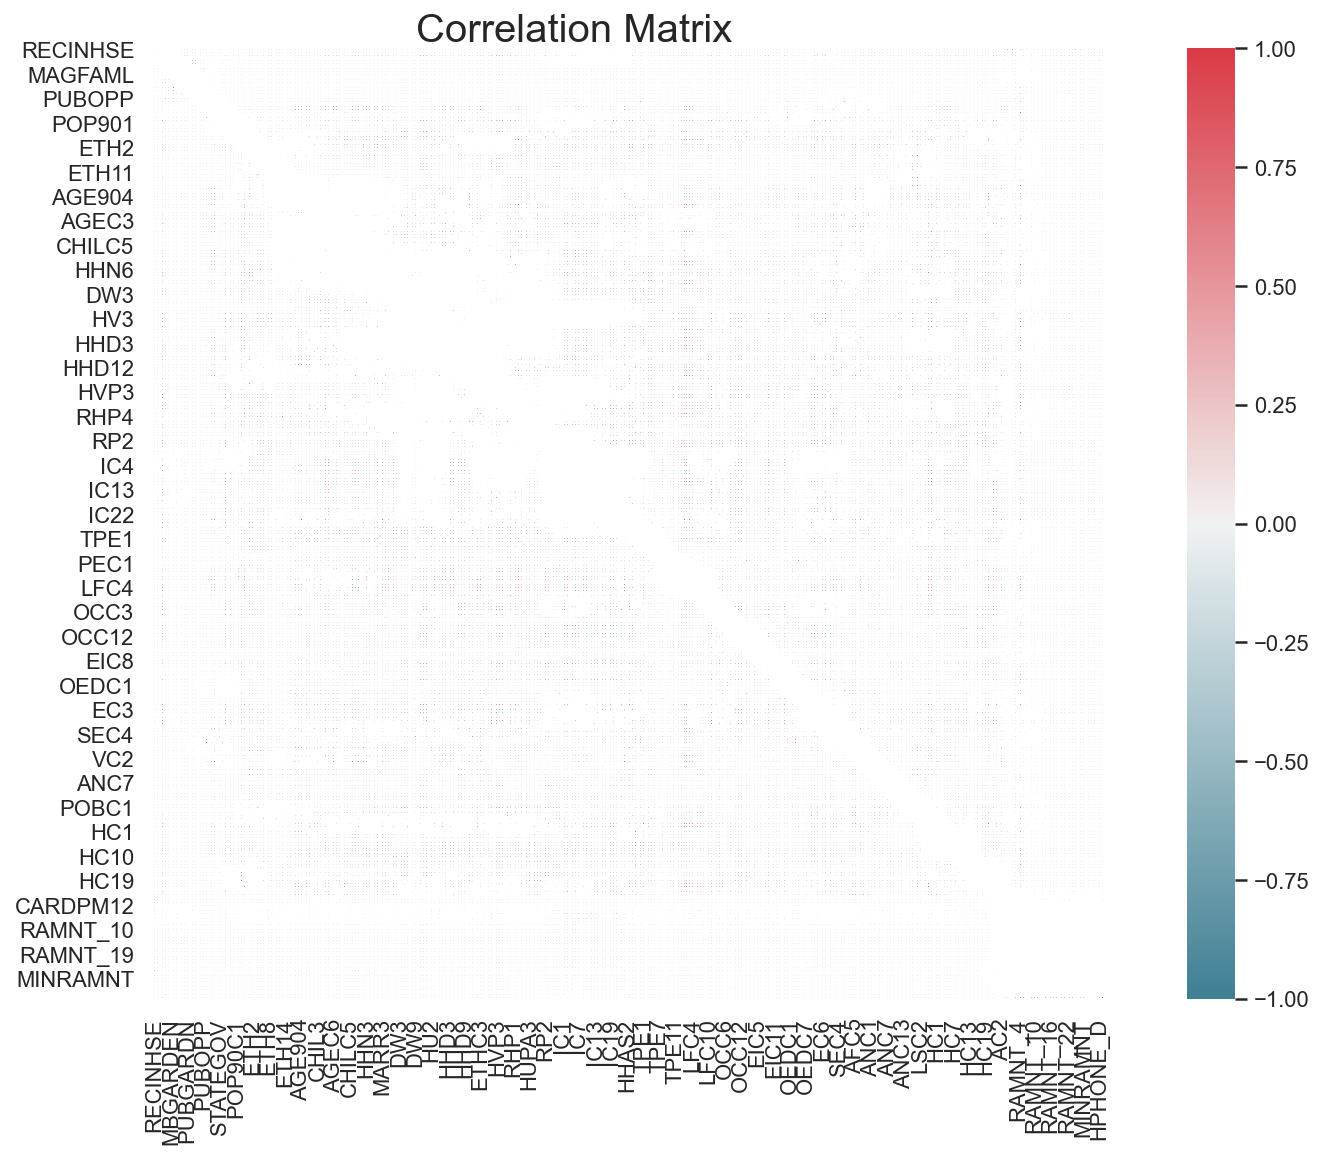

In [157]:
fig = plt.figure(figsize=(15, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.6
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [25]:
#profile = ProfileReport(
#    df, 
 #   title='Tugas Customer Data',
 #   correlations={
  #      "pearson": {"calculate": True},
   #     "spearman": {"calculate": False},
    #    "kendall": {"calculate": False},
     #   "phi_k": {"calculate": False},
      #  "cramers": {"calculate": False},
   # },
#)

In [26]:
#profile.to_notebook_iframe()